# Waiting time distributions
## Nikolas Schnellbächer (2018-08-14)

Many stochastic processes can be characterized by the life time of the states that a given system can be found in.
By monitoring the waiting times one can obtain so called waiting time distributions, which often are a good indicator for the underlying physical/stochastic process. The analysis of waiting time distributions is also useful to address the question if a given system has internal (hidden) substates, which might reveal their existence by modulating the observed waiting time distribution. Often one does not know a priori how many internal states there are, and one might find an answer to this question by investigating the waiting time distributions.

## A simple one-step process
For a very simple example, we start by considering a state with a characteristic mean life time $\tau$. It is well known, that the waiting time distribution then is a simple exponential distribution
\begin{align}
p(t) = \dfrac{1}{\tau} \, \exp\left(-t \, / \, \tau\right).
\end{align}
Note that this is exactly an exponential distribution with mean $\lambda = 1/\tau$
\begin{align}
f_{\lambda}(x) = \lambda \, \exp\left(-\lambda x\right) \qquad \text{for} \quad x > 0 \, ,
\end{align}
where $f_{\lambda}$ is the PDF of the exponential distribution,
which has a mean value
\begin{align}
\langle x \rangle = \dfrac{1}{\lambda} \, .
\end{align}
The exponential distribution is the generic waiting time distribution for a stochastic process with a mean waiting time
\begin{align}
\langle t\rangle = \tau \, .
\end{align}
This can of course also (self-consistently) expressed by rephrasing, that
\begin{align}
\langle t \rangle = \int_{0}^{\infty} t \cdot p(t) \, dt
\end{align}
holds.
If you are interested in this integral, recall that
\begin{align}
\int x\, \exp(-ax) \, dx = -\dfrac{1}{a^2}(1+ax)\exp(-ax)
\end{align}
such that
\begin{align}
\int_{0}^{\infty}t \cdot \dfrac{1}{\tau} \exp(-t\, /\, \tau) \, dt = 
\dfrac{1}{\tau} \left[-\tau^2(1+t\, /\, \tau)\exp(-t\, /\, \tau)\right]_{0}^{\infty} =
\dfrac{1}{\tau}\left(\tau^2(1+0)\cdot 1\right) = \tau \, ,
\end{align}
as expected.

## A generic (sequential two-step process)
Now we consider a sequential two-step process, where a first step $A$ is always followd by a seoncond step $B$, with characteristic time scales $\tau_A$ and $\tau_B$, respectively.
Their individual waiting time distributions are of course again exponential distributions
\begin{align}
p_A(t) &= \dfrac{1}{\tau_A}\, \exp(-t \, / \, \tau_A) \\
p_B(t) &= \dfrac{1}{\tau_B}\, \exp(-t \, / \, \tau_B) \, .
\end{align}
The observed waiting time distribution for such a two step process, where we only can monitor the time $t$ after both steps have been carried out, is given by a convolution integral of both processes
\begin{align}
p(t) &= \int_{0}^{t} p_{A}(\tau) \, p_{B}(t-\tau) \, d\tau \\
&= \dfrac{1}{\tau_A \tau_B} \int_{0}^{t} \exp(-\tau \, /\, \tau_A) \exp(-(t-\tau) \, / \, \tau_B) \, d\tau \\
&= \dfrac{1}{\tau_A \tau_B} \int_{0}^{t} \exp\left(\dfrac{-\tau_B \tau - \tau_A t + \tau_A \tau}{\tau_A\tau_B}\right) \, d\tau \\
&= \dfrac{\exp(-\tau_A t\, /\, \tau_A\tau_B)}{\tau_A \tau_B} 
\int_{0}^{t} \exp\left(\dfrac{-(\tau_B - \tau_A)\tau}{\tau_A\tau_B}\right) \, d\tau \\
&= \dfrac{\exp(-\tau_A t\, /\, \tau_A\tau_B)}{\tau_A \tau_B} 
\left[\dfrac{-\tau_A\tau_B}{\tau_B - \tau_A} \exp\left(\dfrac{-(\tau_B - \tau_A)\tau}{\tau_A\tau_B}\right)
\right]_{0}^{t} \\
&=
\dfrac{\exp(-\tau_A t\, /\, \tau_A\tau_B)}{\tau_B - \tau_A}
\biggl(
-\exp(-(\tau_B - \tau_A)\, t\, /\, \tau_A\tau_B) + 1
\biggl) \\
&=
\dfrac{1}{\tau_B - \tau_A}\biggl( 
\exp(-t\, / \, \tau_B) - \exp(-t\, / \, \tau_A)
\biggl)
\end{align}
Remember, that we always assume, that the two processes happen in the same sequential order (first $A$, followed by step $B$).
Below we show by direct numerical sampling, that this is indeed the case and compare the observed waiting time distributions for the one and two step process.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def getHistogramCoordinates(X, nbins, normed = True):
    '''
    Creates x,y data pairs of the histogram data using
    numpy's histogram function.
    '''
    hist, bin_edges = np.histogram(X, bins = nBins, normed = True)
    bin_centers = (bin_edges[1:] + bin_edges[0:-1]) / 2.0
    assert hist.shape == bin_centers.shape, "Error: Shape assertion failed."

    res = np.zeros((nBins, 2))
    res[:, 0] = bin_centers
    res[:, 1] = hist
    return res

In [3]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [4]:
# this is how we can use python to sample from an exponential distribution
# with a given mean value (here meanTime)
meanTime = 1.5
sampleTime = np.random.exponential(meanTime)
print("sample waiting time =", sampleTime)

sample waiting time = 0.5172097936192911


In [5]:
# specify the number of samples
nSamples = 5000
meanTime = 1.5
sampleTimes = np.random.exponential(meanTime, nSamples)

assert sampleTimes.shape == (nSamples,), "Error: Shape assertion failed."
print(sampleTimes.shape)

(5000,)


Next we create the theoretical distribution, which for this case is of course the standard probability density function of the exponential distribution.

In [6]:
# create the theoretical exponential distribution
nVisPoints = 500
meanValue = meanTime
xVals = np.linspace(0.0, 20.0, nVisPoints)
yVals = np.array([np.exp(-t / meanValue) / meanValue for t in xVals])
expDist = np.zeros((nVisPoints, 2))
expDist[:, 0] = xVals
expDist[:, 1] = yVals

In [7]:
# plotting function to plot the numerically sampled data 
# in conjunction with the exponential distribution

def plot_histogram_wDist(X, nBins, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.hist(X,
            bins = nBins,
            density = True,
            label = r'sampled')
    
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$\mathrm{Exp}(\lambda = \langle t\rangle)$')
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 14.25)
    ax.set_ylim(0.0, 0.625)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

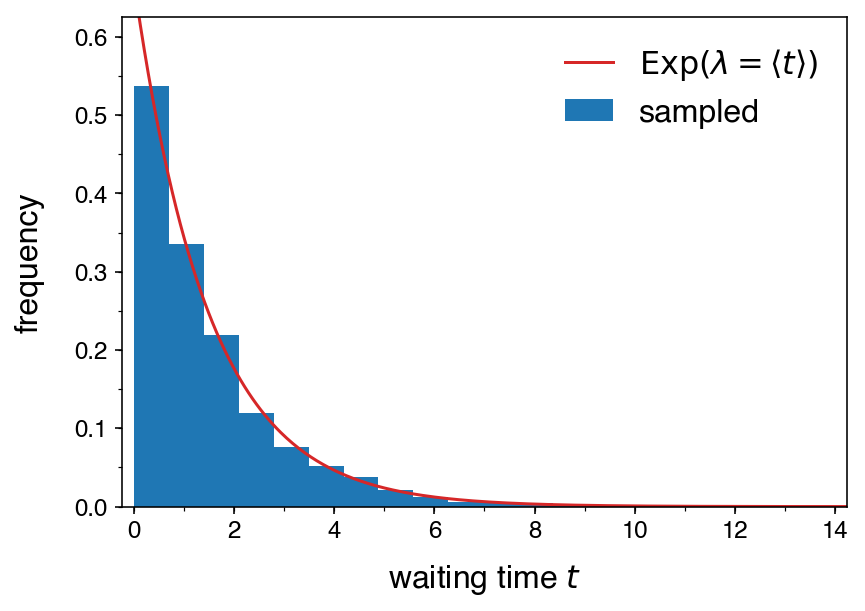

In [8]:
nBins = 20
plot_histogram_wDist(sampleTimes, nBins, expDist)

In [9]:
# plotting function to show that both version of the histogram
# of course perfectly overlay each other

def plot_histogram_comparison(X, nBins, scatterData, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.hist(X,
            bins = nBins,
            density = True,
            label = r'sampled',
            zorder = 1)
    
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$\mathrm{Exp}(\lambda = \langle t\rangle)$',
            zorder = 3)
    
    ax.scatter(scatterData[:, 0], scatterData[:, 1],
               s = 50,
               lw = 1.5,
               facecolor = 'None',
               edgecolor = 'C3',
               zorder = 2)
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 14.25)
    ax.set_ylim(0.0, 0.625)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

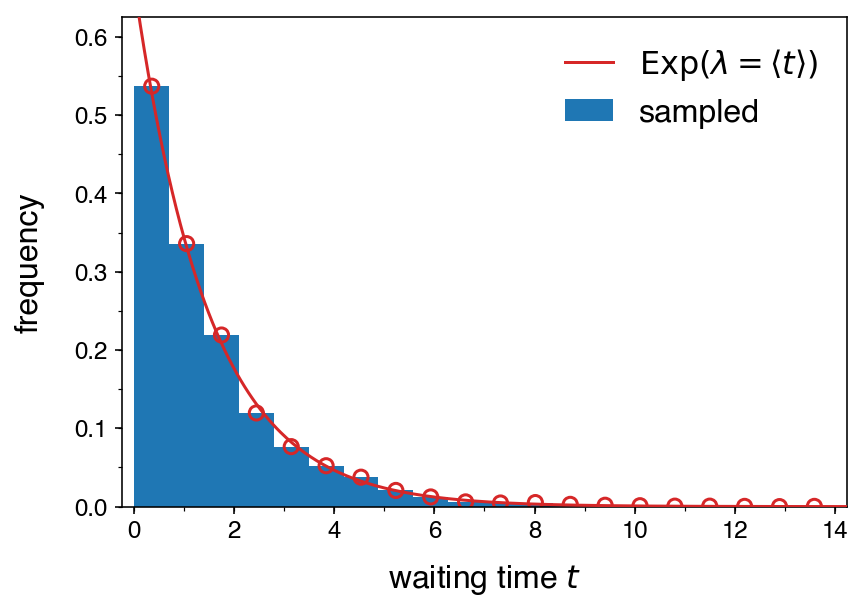

In [10]:
# for an alternative histogram representation I
# create x,y data pairs of the histogram data using
# numpy's histogram function
nBins = 20
scatterData = getHistogramCoordinates(sampleTimes, nBins, normed = True)

plot_histogram_comparison(sampleTimes, nBins, scatterData, expDist)

In [11]:
def plot_scatter_histogram(X, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.plot([-1.0, 20.0], [0.0, 0.0],
            dashes = [6.0, 3.0],
            color = '#CCCCCC',
            lw = 1.0,
            zorder = 1)
        
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$\mathrm{Exp}(\lambda = \langle t\rangle)$',
            zorder = 3)
    
    ax.scatter(X[:, 0], X[:, 1],
               s = 50,
               lw = 1.5,
               facecolor = 'None',
               edgecolor = 'C3',
               zorder = 2,
               label = r'sampled')
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 14.25)
    ax.set_ylim(-0.025, 0.625)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

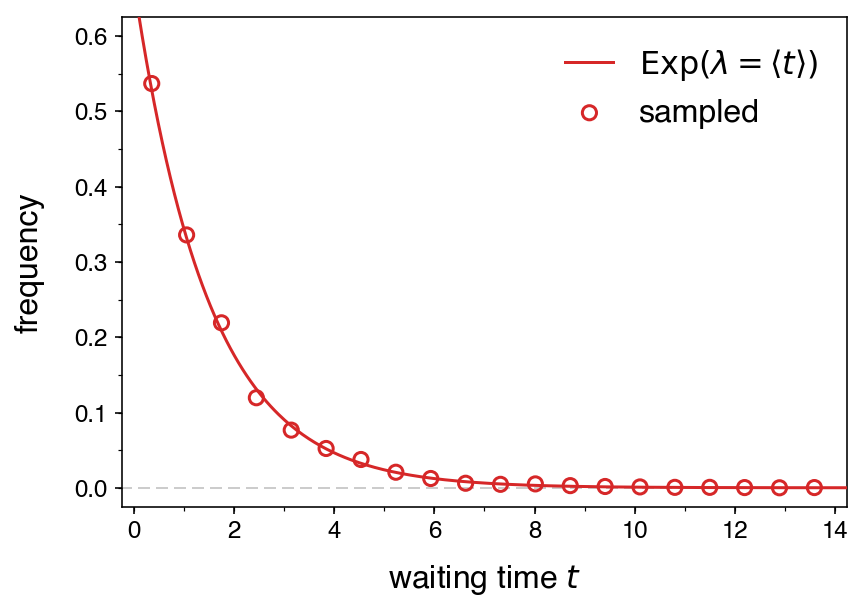

In [12]:
plot_scatter_histogram(scatterData, expDist)

Next we consider a two-step process. The first process has a mean waiting time $\tau_A$ and the second process a mean waiting time $\tau_B$.

In [13]:
# set the mean waiting times for the two-step process
tau_A = 1.0
tau_B = 1.5

# specify the number of samples
nSamples = 500000

tauAs = np.random.exponential(tau_A, nSamples)
tauBs = np.random.exponential(tau_B, nSamples)
assert tauAs.shape == tauBs.shape

observedTimes = tauAs + tauBs # a sequential two step process
assert observedTimes.shape == (nSamples,), "Error: Shape assertion failed."
print(observedTimes.shape)

(500000,)


In [14]:
# create the theoretical distribution
# Here this distribution is the convolution of two exponential distributions.
nVisPoints = 300
tau_A = 1.0
tau_B = 1.5
xVals = np.linspace(-2.0, 20.0, nVisPoints)
yVals = np.array([(np.exp(-t / tau_B) - np.exp(-t / tau_A)) \
                  / (tau_B - tau_A) for t in xVals])
dist2 = np.zeros((nVisPoints, 2))
dist2[:, 0] = xVals
dist2[:, 1] = yVals

In [15]:
# plotting function to plot the numerically sampled data 
# in conjunction with the exponential distribution

def plot_histogram_wDist_2step(X, nBins, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.hist(X,
            bins = nBins,
            density = True,
            label = r'sampled')
    
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$p(t)$')
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 15.75)
    ax.set_ylim(0.0, 0.315)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

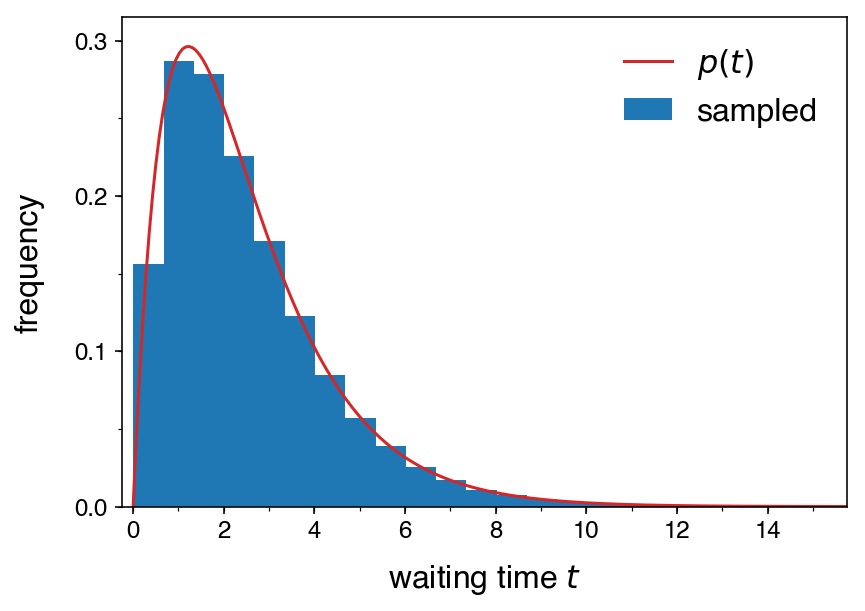

In [16]:
nBins = 30
plot_histogram_wDist_2step(observedTimes, nBins, dist2)

In [17]:
def plot_scatter_histogram(X, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.plot([-1.0, 20.0], [0.0, 0.0],
            dashes = [6.0, 3.0],
            color = '#CCCCCC',
            lw = 1.0,
            zorder = 1)
        
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$p(t)$',
            zorder = 3)
    
    ax.scatter(X[:, 0], X[:, 1],
               s = 50,
               lw = 1.5,
               facecolor = 'None',
               edgecolor = 'C3',
               zorder = 2,
               label = r'sampled')
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 15.75)
    ax.set_ylim(-0.025, 0.315)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

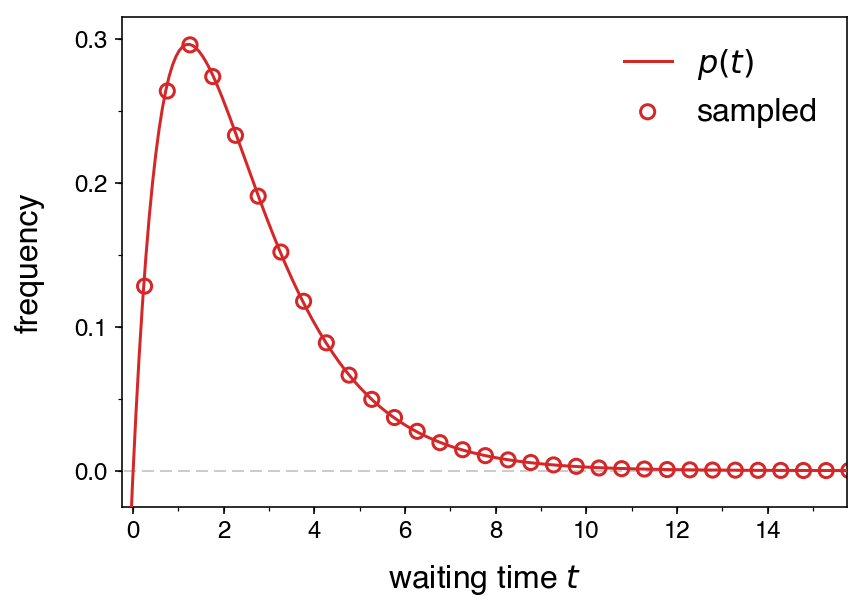

In [18]:
# for an alternative histogram representation I
# create x,y data pairs of the histogram data using
# numpy's histogram function
nBins = 40
scatterData2 = getHistogramCoordinates(observedTimes, nBins, True)

plot_scatter_histogram(scatterData2, dist2)

In [19]:
def plot_one_vs_two(X1, dist1, X2, dist2):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.plot([-1.0, 20.0], [0.0, 0.0],
            dashes = [6.0, 3.0],
            color = '#CCCCCC',
            lw = 1.0,
            zorder = 1)
        
    ax.plot(dist1[:, 0], dist1[:, 1],
            lw = 1.5,
            color = 'C0',
            label = r'$p(t)$',
            zorder = 3)

    ax.plot(dist2[:, 0], dist2[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$p(t)$',
            zorder = 3)
    
    ax.scatter(X1[:, 0], X1[:, 1],
               s = 50,
               lw = 1.5,
               facecolor = 'None',
               edgecolor = 'C0',
               zorder = 2,
               label = r'one step (sampled)')

    ax.scatter(X2[:, 0], X2[:, 1],
               s = 50,
               lw = 1.5,
               facecolor = 'None',
               edgecolor = 'C3',
               zorder = 2,
               label = r'two step (sampled)')
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'$p(t)$ observed / frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 15.75)
    ax.set_ylim(-0.025, 0.615)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

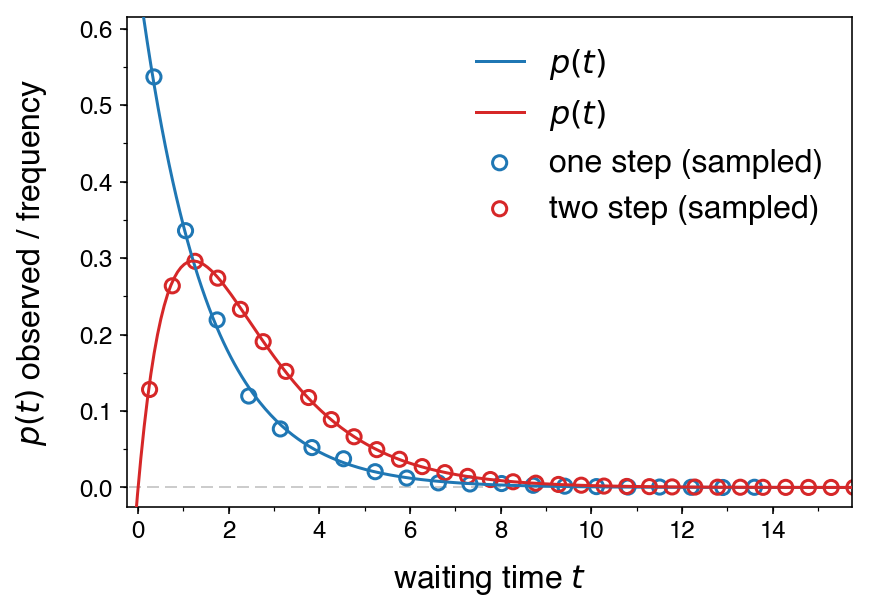

In [20]:
plot_one_vs_two(scatterData, expDist, scatterData2, dist2)

In the plot above, we see that the observed waiting time distribution $p(t)$ of a one-step process is fudamentaly different from the observed waiting time distribution of a two-step process (1 hidden internal state). This internal state can thus be revealed by analysis of waiting time distributions.

## Multi-step processes with equal characteristic time
Below we consider a multistep process, where each individual process has the same identical characteristic mean
waiting time $\tau$.

In [21]:
# set the mean waiting times for a multi-step process
tau = 1.0
nBins = 50

# specify the number of samples
nSamples = 500000
steps_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

res = []
for j, steps in enumerate(steps_list):
    
    observedTimes = np.zeros((nSamples))

    for i in range(steps):
    
        observedTimes += np.random.exponential(tau, nSamples)

    assert observedTimes.shape == (nSamples,), "Error: Shape assertion failed."
    
    tmp = getHistogramCoordinates(observedTimes, nBins, True)
    res.append(tmp)

In [22]:
def plot_multi(res, labels):
    
    assert len(res) == len(labels), "Error: Length assertion failed."
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.plot([-1.0, 20.0], [0.0, 0.0],
            dashes = [6.0, 3.0],
            color = '#CCCCCC',
            lw = 1.0,
            zorder = 1)

    for i in range(len(res)):
        
        X = res[i]
        
        ax.plot(X[:, 0], X[:, 1],
                lw = 1.5,
                # color = 'C0',
                label = labels[i],
                zorder = 3)

    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'$p(t)$ observed / frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 20.1, 2.0)
    minor_x_ticks = np.arange(0.0, 20.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 20.25)
    ax.set_ylim(-0.025, 0.615)
    ax.set_axisbelow(False)
    
    leg = ax.legend(bbox_to_anchor = [1.0, 1.0],
                    loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

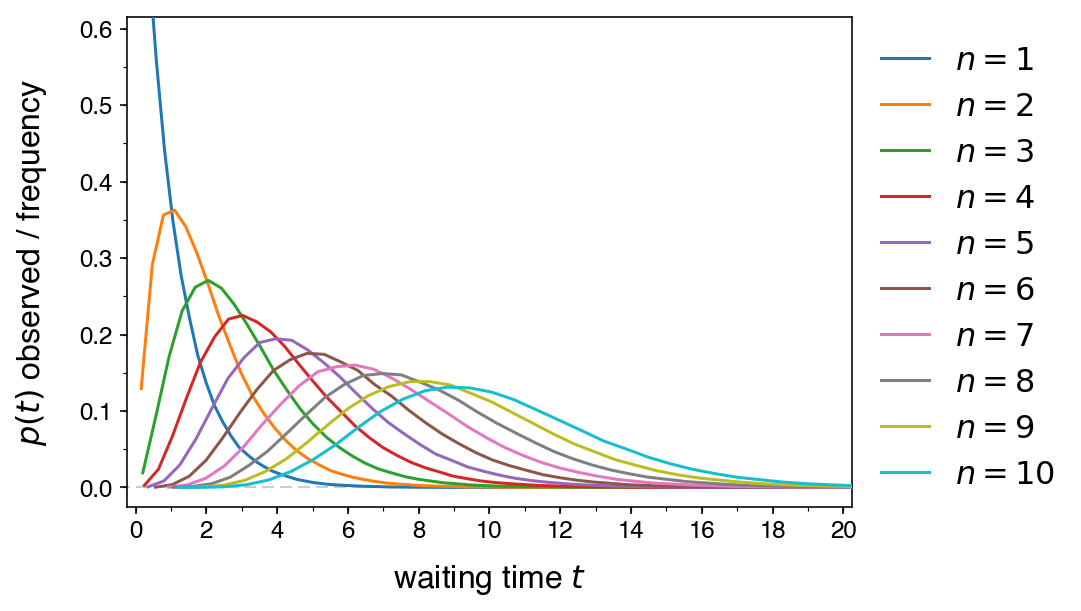

In [23]:
# plot the mult-step results

labels = [r'$n = 1$',
          r'$n = 2$',
          r'$n = 3$',
          r'$n = 4$',
          r'$n = 5$',
          r'$n = 6$',
          r'$n = 7$',
          r'$n = 8$',
          r'$n = 9$',
          r'$n = 10$']

plot_multi(res, labels)

For further information on this topic, vave a look at the following two sources:

* Rob Phillips et al. - **Physical Biology of the Cell** (2nd edition, 2013).
They discuss this issue in the context of molecular motors, where multiple internal states of a molecular motor
are often hidden, i.e. not accessible to direct experimental observation. However sometimes one can reveal the existence of such states by analyzing the corresponding waiting-time distributions.

* D. L. Floyd et al. - Analysis of Kinetic Intermediates in Single-Particle Dwell-Time Distributions, *Biophysical Journal*, **99**, 360-366, 2010.